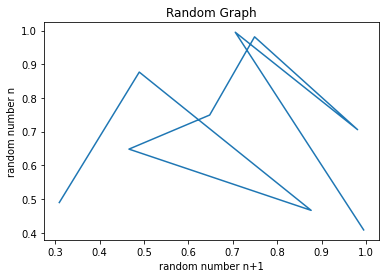

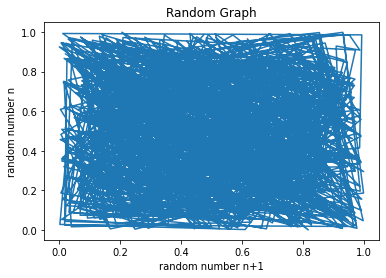

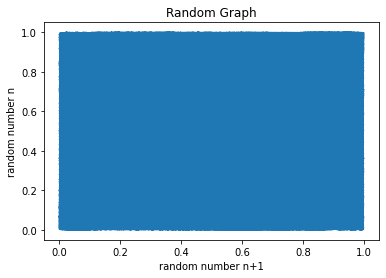

In [0]:
#Task: Generate 10, 1000 and 100,000 random numbers and make graphs of 𝑥𝑖 on the y-axis and 𝑥𝑖+1 on the x-axis.

#IMPORTS
import matplotlib.pyplot as plt  #import library
import numpy as np
import random
from copy import *

#code written such that you can easily generate plots for an arbitrary amount of numbers
def randomsetgenerator(how_many_numbers_you_want_to_generate):

  #create a set of random numbers
  randomset=[]
  k=0
  while k<how_many_numbers_you_want_to_generate:
    randomset.append(random.random())
    k += 1

  #create lists for x and y values, where each x value in nth value from the original list and each y value is the nth+1 value from the original list
  x=deepcopy(randomset, memo=None, _nil=[])
  x.pop(0)
  y=deepcopy(randomset, memo=None, _nil=[])
  y.pop()

  #plot graph
  plt.plot(x, y) 
  plt.xlabel('random number n+1')  
  plt.ylabel('random number n') 
  plt.title('Random Graph') 
  plt.show() 

randomsetgenerator(10)
randomsetgenerator(1000)
randomsetgenerator(100000)

Assuming your graph looks reasonable, let’s proceed:- Radioactive decay is a good
starting place. 

Atoms have a characteristic half life – called 𝑡1/
2
– with the number of
atoms which remain at any given time t given by:
𝑁(𝑡) = 𝑁0 × 2
^
(𝑡/(
𝑡1/
2))


Probability for one atom decaying at any given time is
𝑝(𝑡) = 1 − 2
^(
𝑡
/(𝑡1/
2))


Task: divide your simulation into many time steps (much smaller than 𝑡1
/2
) and for
each atom in each time step, generate a random number, if random number is
bigger than p, then the atom decays.
Record the number of atoms which have decayed and the number remaining at the
end of each time step at the end of the simulation, plot this on a graph.


Run this simulation for 25, 250 and 5000 atoms and repeat it three times for each
number of atoms. What do you notice about the variation of each simulation for the
different numbers of atoms?

Number of atoms you start with:  25
Chosen half-life:  500  u
Experiment run for:  100  u
(time unit u is arbitrary)


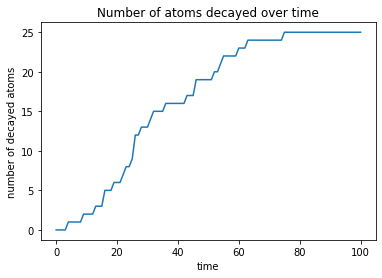

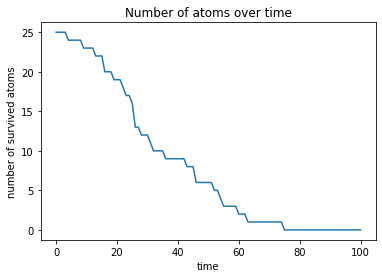

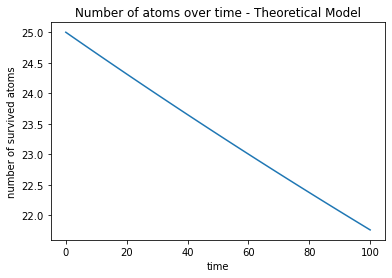

Number of atoms you start with:  250
Chosen half-life:  500  u
Experiment run for:  100  u
(time unit u is arbitrary)


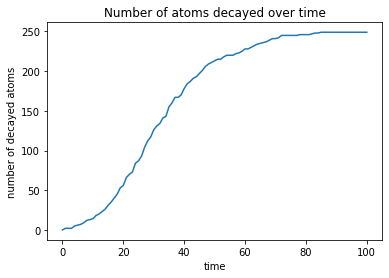

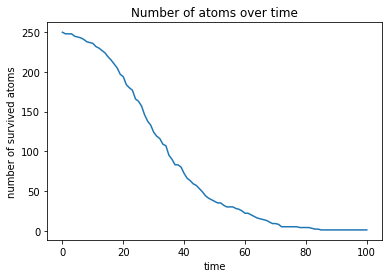

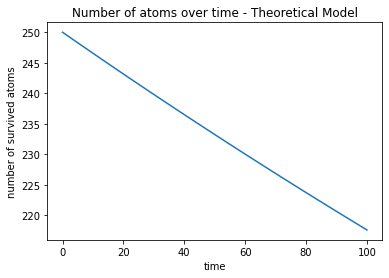

Number of atoms you start with:  5000
Chosen half-life:  500  u
Experiment run for:  100  u
(time unit u is arbitrary)


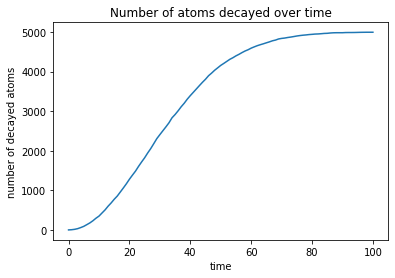

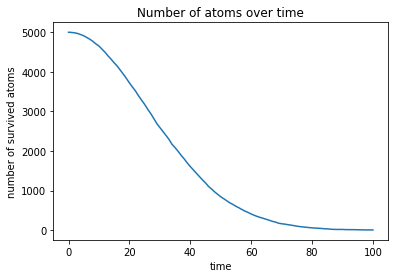

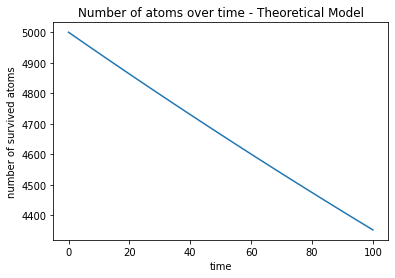

Number of atoms you start with:  1000000
Chosen half-life:  500  u
Experiment run for:  100  u
(time unit u is arbitrary)


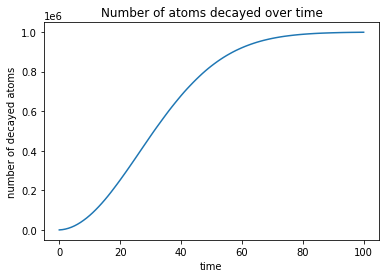

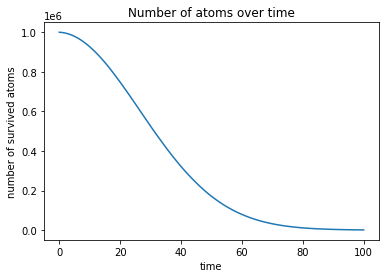

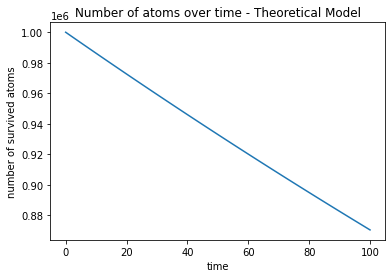

In [5]:
#make function that lets you specify all possible variables
def radiodecay(N_atoms_you_start_with, how_long_you_let_experiment_run, half_life):
  #print logistics
  print("Number of atoms you start with: ", N_atoms_you_start_with)
  print("Chosen half-life: ", half_life, " u")
  print("Experiment run for: ", how_long_you_let_experiment_run, " u")
  print("(time unit u is arbitrary)")

  #definition axis for graphs - lists
  y_survive=[N_atoms_you_start_with]
  y_decay=[0]
  time=list(range(1, how_long_you_let_experiment_run+1))

  #define lists of atoms
  survived=[1]*N_atoms_you_start_with
  decayed=[]

  #get n of particles for each moment in time
  for k in time:

    #values that your particles will randomly have that will determine if they decay or not
    myvalues=[]

    #probability formula of particles dacaying for each moment in time
    p=(1-(2**((0-k)/half_life)))

    #for every survived atom define random value 0-1
    for i in range(len(survived)):
      myvalues.append(random.random())

    #check if that value is bigger than p (if probability of decay is eg. 0.2, then all particles with random values below 0.2 will get decayed (20%) while the ones with values above 0.2 will not)
    for j in range(len(myvalues)):
      if myvalues[j]<p:
        survived.pop(0)
        decayed.append(1)
      else:
        pass

    #at the end of each time step count how many atoms are still survived and how many are not. Add this info to a list of survived/decayed atoms, where each element is a number of survived/decayed atoms at one moment in time
    y_survive.append(len(survived))
    y_decay.append(len(decayed))

  #add time 0, to make lists for x and y axis of the graphs comparable
  time.insert(0, 0)

  #graph it
  plt.plot(time, y_decay) 
  plt.xlabel('time')  
  plt.ylabel('number of decayed atoms') 
  plt.title('Number of atoms decayed over time') 
  plt.show() 

  plt.plot(time, y_survive) 
  plt.xlabel('time')  
  plt.ylabel('number of survived atoms') 
  plt.title('Number of atoms over time') 
  plt.show() 

  #check
  #plot a graph based on the well-known formula for the number of particles at each moment in time
  ParticleNumberModel=[]
  for i in time:
    ParticleNumberModel.append(N_atoms_you_start_with*2**(-(i/half_life)))

  #plot graph
  plt.plot(time, ParticleNumberModel) 
  plt.xlabel('time')  
  plt.ylabel('number of survived atoms') 
  plt.title('Number of atoms over time - Theoretical Model') 
  plt.show()

radiodecay(25, 100, 500)
radiodecay(250, 100, 500)
radiodecay(5000, 100, 500)
radiodecay(1000000, 100, 500)

Short Comment

It can be seen that the graphs made accoring to the instructions of the task somehow differ from the graphs obtained by the theoretical formula provided. I have been trying to spot a mistake in my logic but did not find it - if you do, please let me know. The error should not arise from the "flawed randomness" with which Python might be producing random values - that should average out in 1000000 tries or so. Probabily it is in some silly mistake that I made but I am not seeing it.

Another thing that I observe is that if I run the code multiple times, the less atoms I start out with, the more the same type of produced graphs differ. This is intuitive, as bigger number of starting atoms deals away with the small variantions in "randomness" of numbers assigned to atoms, based on which they either decay or not.

One final think that should be noted is that changing of the half life number changes the slope of the graph as well. This will be shown below:




Number of atoms you start with:  5000
Chosen half-life:  50  u
Experiment run for:  100  u
(time unit u is arbitrary)


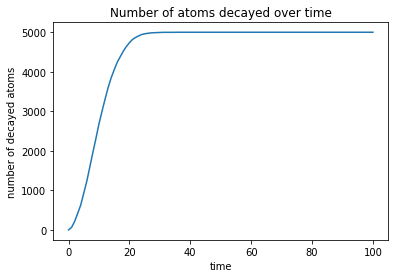

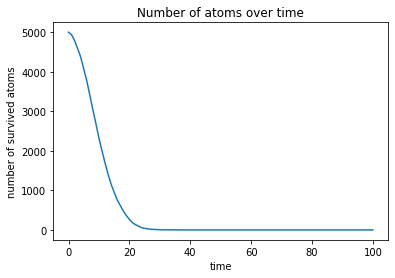

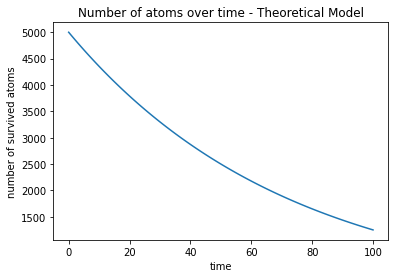

Number of atoms you start with:  5000
Chosen half-life:  200  u
Experiment run for:  100  u
(time unit u is arbitrary)


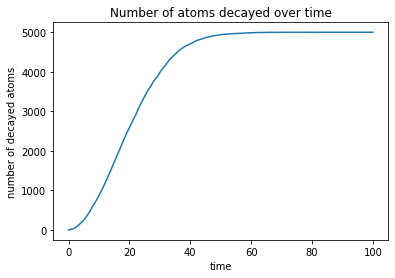

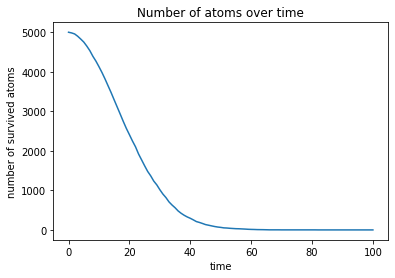

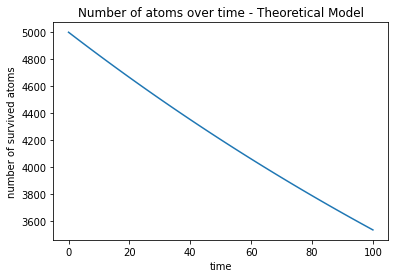

Number of atoms you start with:  5000
Chosen half-life:  700  u
Experiment run for:  100  u
(time unit u is arbitrary)


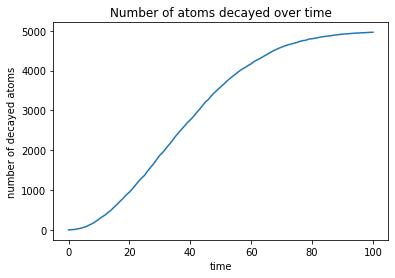

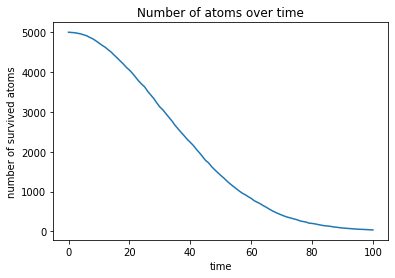

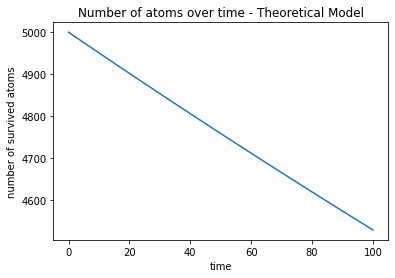

Number of atoms you start with:  5000
Chosen half-life:  1500  u
Experiment run for:  100  u
(time unit u is arbitrary)


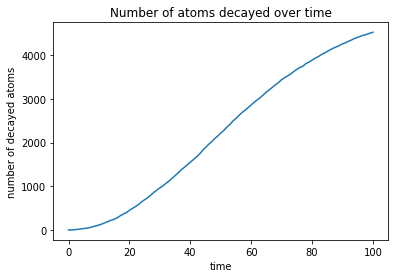

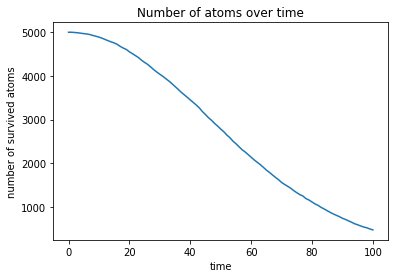

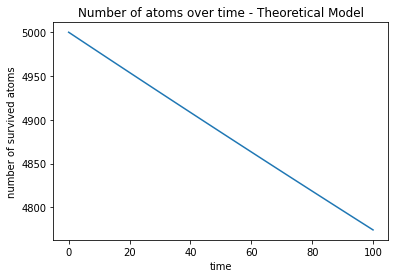

Number of atoms you start with:  5000
Chosen half-life:  5000  u
Experiment run for:  100  u
(time unit u is arbitrary)


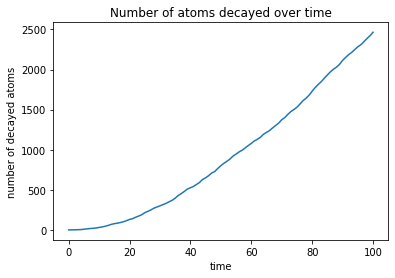

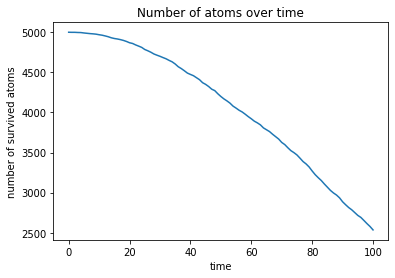

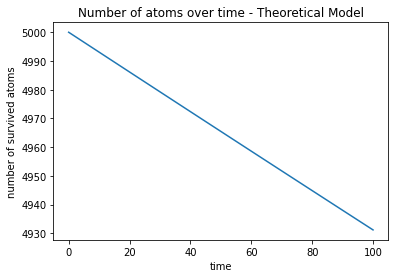

Number of atoms you start with:  5000
Chosen half-life:  15000  u
Experiment run for:  100  u
(time unit u is arbitrary)


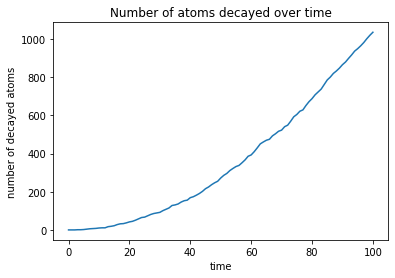

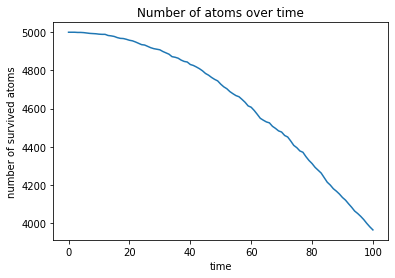

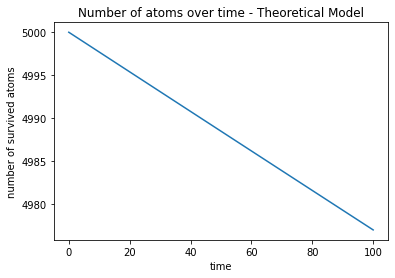

In [9]:
radiodecay(5000, 100, 50)
radiodecay(5000, 100, 200)
radiodecay(5000, 100, 700)
radiodecay(5000, 100, 1500)
radiodecay(5000, 100, 5000)
radiodecay(5000, 100, 15000)

What this shows is that some half lives give graphs that look more similar to the model as others. For example, if half life=1500, my model and theory model appear very similar, but if I significantly increase/decrease my half life, my graphs differ a lot from those predicted.
